## Unknown Delay

In this section, we are concerned with a signal whose precise time of arrival at the receiver, i.e., the transmission delay, is unknown. 

This type of problem arises naturally in radar systems, but it also occurs often in some communications systems where transmissions of data or synchronization probes are emitted in erratic bursts. 

The unknown time of arrival is denoted by an analog random variable $ t_0 $ quantized to $ t_l $.

Under hypothesis $ H_i $, the continuous-time received signal is

$$
y(t) = \alpha a_i(t - t_0) e^{j [2\pi (f_i + f_d)(t - t_0) + \phi_i(t - t_0) + \beta]} + z(t), \quad i = 0, 1 \quad t_0 \leq t \leq T + t_0
$$

Since the time of arrival is unknown, it is generally necessary to observe $ y_i(t) $ for a period of time in excess of the limits. 

Nonetheless, we can still use this signal expression as a model for times preceding $ t_0 $ and for times after $ T + t_0 $ by using appropriate amplitude and phase functions $ a_i(t) $ and $ \phi_i(t) $.

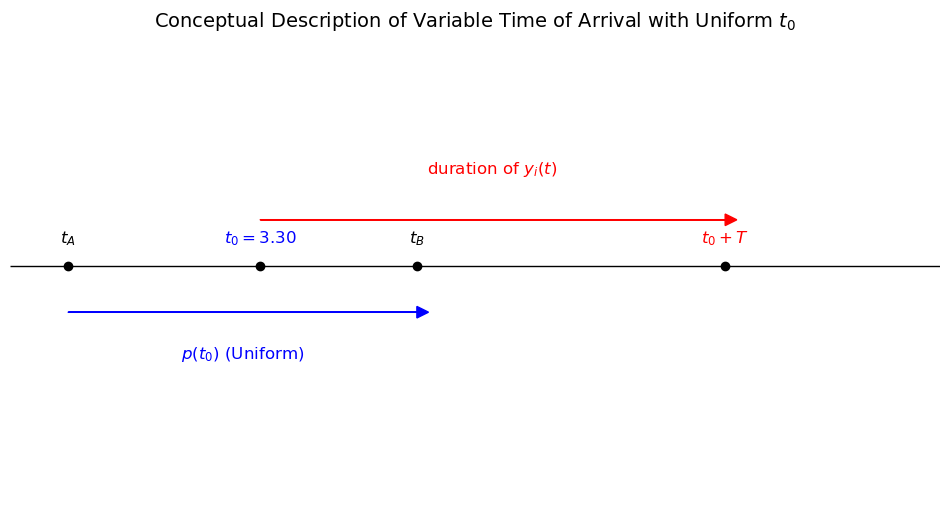

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time points
t_A = 0  # Earliest arrival time
t_B = 6  # Latest arrival time
T = 8    # Duration of observation window
t_0 = np.random.uniform(t_A, t_B)  # Uniformly distributed random t_0

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Draw the timeline
ax.hlines(0, t_A - 1, t_B + T + 1, color="black", linewidth=1)
ax.scatter([t_A, t_0, t_B, t_0 + T], [0, 0, 0, 0], color="black")

# Label the points
ax.text(t_A, 0.1, "$t_A$", fontsize=12, ha='center')
ax.text(t_0, 0.1, f"$t_0 = {t_0:.2f}$", fontsize=12, ha='center', color="blue")
ax.text(t_B, 0.1, "$t_B$", fontsize=12, ha='center')
ax.text(t_0 + T, 0.1, "$t_0 + T$", fontsize=12, ha='center', color="red")

# Draw the signal p(t_0) arrow
ax.arrow(t_A, -0.2, t_B - t_A, 0, head_width=0.05, head_length=0.2, fc='blue', ec='blue')
ax.text((t_A + t_B) / 2, -0.4, "$p(t_0)$ (Uniform)", fontsize=12, ha='center', color="blue")

# Draw the duration of y_i(t) arrow
ax.arrow(t_0, 0.2, T, 0, head_width=0.05, head_length=0.2, fc='red', ec='red')
ax.text(t_0 + T / 2, 0.4, "duration of $y_i(t)$", fontsize=12, ha='center', color="red")

# Format the plot
ax.set_ylim(-1, 1)
ax.set_xlim(t_A - 1, t_B + T + 1)
ax.axis('off')

# Show the plot
plt.title("Conceptual Description of Variable Time of Arrival with Uniform $t_0$", fontsize=14)
plt.show()




Figure above displays the conceptual problem. 

$ y_i(t) $ extends over the time interval $ (t_0, t_0 + T) $. 

However, $ t_0 $ is itself unknown and is characterized by its probability density function $ p(t_0) $, which in the figure is shown to extend over a finite interval $ (t_A, t_B) $. 

There are no theoretical limitations on $ t_A $ or $ t_B $, but practical considerations can often be used to estimate the earliest or latest times the signal could arrive $ (t_A $ and $ t_B $, respectively).

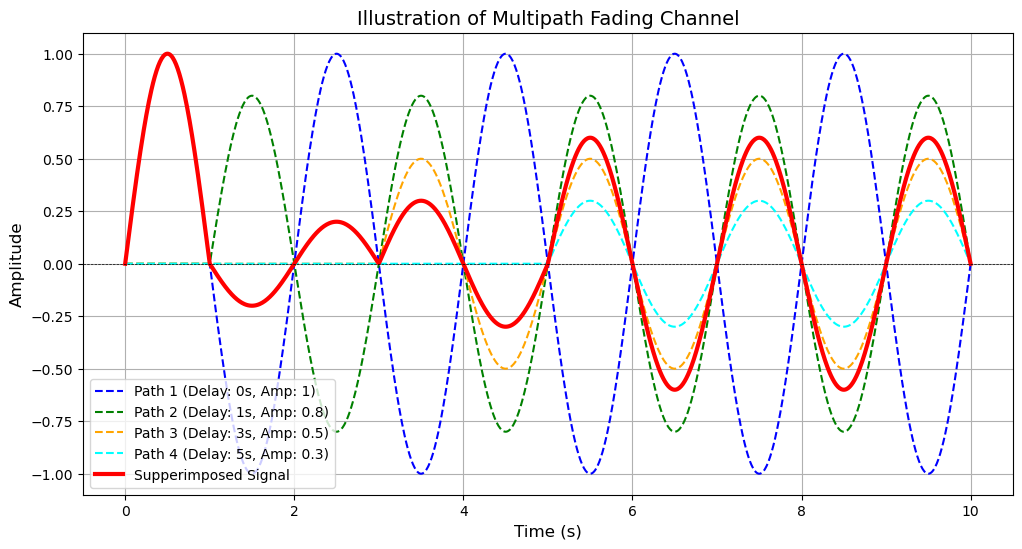

In [3]:
# Plot to illustrate multipath fading channel phenomenon

# Parameters
t = np.linspace(0, 10, 1000)  # Time vector
paths = [1, 0.8, 0.5, 0.3]  # Relative amplitudes of paths
delays = [0, 1, 3, 5]  # Delays in time for each path
colors = ['blue', 'green', 'orange', 'cyan']

# Composite signal (sum of multipath components)
composite_signal = np.zeros_like(t)

# Plot the individual paths and composite signal
plt.figure(figsize=(12, 6))

for i, (amp, delay, color) in enumerate(zip(paths, delays, colors)):
    path_signal = amp * np.sin(2 * np.pi * 0.5 * (t - delay)) * (t >= delay)
    composite_signal += path_signal
    plt.plot(t, path_signal, label=f"Path {i+1} (Delay: {delay}s, Amp: {amp})", linestyle="--", color=color)

# Plot the composite signal
plt.plot(t, composite_signal, label="Supperimposed Signal", color="red", linewidth=3)

# Labels and legend
plt.title("Illustration of Multipath Fading Channel", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()

plt.show()


### Noncoherent Receiver

In developing receiver structures, we first assume that the attenuation $ \alpha $ and frequency shift $ f_d $ are known. 

Under these conditions, the frequency shift $ f_d $ can be set equal to zero with no loss of generality. 

The phase $ \beta $, on the other hand, is assumed to be uniformly distributed on the interval $ (0, 2\pi) $. 

As a result of these assumptions, noncoherent receiver structures are obtained.

### Unknown Time of Arrival, Known Amplitude and Frequency

Using a similar approach to that developed for unknown phase section, we have $ k $ samples over the interval $ T $. 

However, to account for the unknown time of arrival, we will quantize $ t_0 $ to occur at $ t_l $. 

The $ j $-th sample under hypothesis $ H_i $ is

$$
y_j = \alpha a_i(t_j - t_l)e^{j[2\pi f_i (t_j - t_l) + \phi_i(t_j - t_l) + \beta_i]} + z_j, \quad i = 0, 1, \quad j = l, \ldots, l + k
$$

which can be written in vector notation as

$$
\vec{y} = \alpha \vec{u}_i e^{j \beta_i} + \vec{z}
$$

where

$$
\begin{align*}
\vec{u}_i &= \{ u_{i,l}, u_{i,l+1}, \ldots, u_{i,l+k} \}^T \\
&= \{ a_i(t_j - t_l)e^{j[2\pi f_i (t_j - t_l) + \phi_i(t_j - t_l)]} \}^T
\end{align*}
$$

Averaging over the random phase $ \beta_i $ as in preceding sections, we can write the conditional density function of $ \vec{y} $ given $ t_l $ as

$$
\begin{align*}
p_i(\vec{y} | t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 \right) \\
&\times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* \right| \right) \\
&\times \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
$$

Since we are dealing with sampled systems, we quantize the times $ t_A $ and $ t_B $ and associate the sample numbers $ l_A $ and $ l_B $ with them. 

Correspondingly, we denote the probability

$$
P(t_l) = P(l)
$$

It follows that we can approximate the unconditional density function of $ \vec{y} $ as

$$
\boxed{
\begin{align*}
p_i(\vec{y}) &= \frac{1}{(2 \pi \sigma_z^2)^k} \sum_{l=l_A}^{l_B} P(l) \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 \right) \\
&\times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* \right| \right) \\
&\times \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
}
$$

In general, at this point we would calculate the likelihood ratio $ L(\vec{y}) = \frac{p_1(\vec{y})}{p_0(\vec{y})} $ and determine receiver structures from it. 

Unfortunately, this approach does not lead to practical structures. 

If, on the other hand, we return to $p_i(\vec{y} | t_l)$, we can define a **conditional likelihood function** as

$$
L(\vec{y} | t_l) = \frac{p_1(\vec{y} | t_l)}{p_0(\vec{y} | t_l)} = \frac{I_0 \left( \frac{\alpha}{\sigma_z^2} \sum_{j=l}^{l+k} y_j u_{1j}^* \right) \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{1j}|^2 \right)}{I_0 \left( \frac{\alpha}{\sigma_z^2} \sum_{j=l}^{l+k} y_j u_{0j}^* \right) \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{0j}|^2 \right)}
$$

or, better yet, a **conditional log-likelihood function** as

$$
\begin{align*}
\ln L(\vec{y} | t_l) &= \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{1j}^* \right| \right) - \frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{1j}|^2 \\
&- \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{0j}^* \right| \right) + \frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{0j}|^2
\end{align*}
$$



from which we can derive **an average near-optimal receiver** from the equation

$$
\begin{align*}
\sum_{l=l_A}^{l_B} P(l) \ln L(\vec{y} | t_l)
&= \sum_{l=l_A}^{l_B} \left[ \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{1j}^* \right| \right) - \frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{1j}|^2 \right] \cdot P(l) \\
&- \sum_{l=l_A}^{l_B} \left[ \ln I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{0j}^* \right| \right) - \frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{0j}|^2 \right] \cdot P(l)
\end{align*}
$$

![](./Figures/fig_6_17.png)

Figure 6.17 shows such a receiver. 

* The sampled inputs $ y_j $ are processed by two digital matched filters, each producing sampled outputs represented as $ \{ X_{i,l} \} $, $ i = 0, 1 $, where

    $$
    X_{i,l} = \sum_{j=l}^{l+k} y_j u_{ij}^*, \quad i = 0, 1
    $$

* The magnitude of each sample is determined, scaled by the factor $ \alpha / \sigma_z^2 $, and then processed by a $ \ln I_0(\cdot) $ nonlinearity. 

* Then, a predetermined bias is removed from each sample. 

* The bias is represented by

    $$
    Y_{i,l} = \frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2, \quad i = 0, 1
    $$

* Finally, all the samples are weighted by $ P(l) $ and accumulated, producing the decision variables $ U_1 $ and $ U_0 $.

### Unknown Time of Arrival and Amplitude—Known Frequency

In this case, we write the conditional probability as a conditional pdf over $ \alpha $ and $ t_l $:

$$
\begin{align*}
p_i(\vec{y} | \alpha, t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 \right) \\
&\times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* \right| \right) \\
&\times \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 \right), \quad i = 0, 1
\end{align*}
$$

We assume that the amplitude density function is a Rician.

We then average the conditional probability over it produces

$$
\begin{align*}
p_i(\vec{y} | t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k \sigma_r^2} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 - \frac{\Upsilon^2}{2 \sigma_r^2} \right) \\
&\times \frac{1}{2 c_{i,l}} \exp \left( \frac{g_{i,l}^2 + e^2}{4 c_{i,l}} \right) I_0 \left( \frac{e}{2 c_{i,l}} g_{i,l} \right)
\end{align*}
$$

where

$$
c_{i,l} = \frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 + \frac{1}{2 \sigma_r^2}
$$

the random variable $ g_{i,l} $ is

$$
g_{i,l} = \frac{1}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* \right|
$$

and

$$
e = \frac{\Upsilon}{\sigma_r^2}
$$

It follows that the conditional log-likelihood function is

$$
\begin{align*}
\ln L(\vec{y} | t_l) &= \frac{g_{1,l}^2 + e^2}{4 c_{1,l}} + \ln I_0 \left( \frac{e}{2 c_{1,l}} g_{1,l} \right) - \ln c_{1,l} \\
&- \frac{g_{0,l}^2 + e^2}{4 c_{0,l}} - \ln I_0 \left( \frac{e}{2 c_{0,l}} g_{0,l} \right) + \ln c_{0,l}
\end{align*}
$$

and an average near-optimal receiver can be found by averaging over the random variable $ t_l $ from $ l = l_A $ to $ l = l_B $. 

This is given in the following decision variable, 

$$
U_i = \sum_{l=l_A}^{l_B} P(l) \cdot \left[ \frac{g_{i,l}^2 + e^2}{4 c_{i,l}} + \ln I_0 \left( \frac{e}{2 c_{i,l}} g_{i,l} \right) - \ln c_{i,l} \right], \quad i = 0, 1
$$

and a functional block diagram is

![](./Figures/fig_6_19.png)

### Unknown Time of Arrival, Amplitude, and Frequency

This section closely follows the development and nomenclature of Section of Unknown Frequency. 

Using the development of $p_i(\vec{y} | \alpha, f_d)$, we can write the conditional density function as

$$
\begin{align*}
p_i(\vec{y} | \alpha, f_d, t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 \right) \\
& \times I_0 \left( \frac{\alpha}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* v_j^* \right| \right)\\
&\times \exp \left( -\frac{\alpha^2}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 \right)
\end{align*}
$$

which, after averaging over the Rician variable $ \alpha $, is

$$
\begin{align*}
p_i(\vec{y} | f_d, t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k \sigma_r^2} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 - \frac{\Upsilon^2}{2 \sigma_r^2} \right) \\
& \times \frac{1}{2 c_{i,l}} \exp \left( \frac{\tilde{g}_{i,l}^2 + e}{4 c_{i,l}} \right) \\
&\times I_0 \left( \frac{e}{2 c_{i,l}} \tilde{g}_{i,l} \right)
\end{align*}
$$

where $ c_{i,l} $ and $ e $ are defined previously as

$$
c_{i,l} = \frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |u_{ij}|^2 + \frac{1}{2 \sigma_r^2}
$$

and

$$
e = \frac{\Upsilon}{\sigma_r^2}
$$

and the random variable $ \tilde{g}_{i,l} $ is

$$
\tilde{g}_{i,l} = \frac{1}{\sigma_z^2} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* v_j^* \right|
$$

and

$$
v_j = e^{j2\pi f_d t_j}
$$

Using approximations for the pdf of $ f_d $, similar to those of Eqs. (6.89) and (6.90), we can average over $ f_d $ to obtain

$$
\begin{align*}
p_i(\vec{y} | t_l) &= \frac{1}{(2 \pi \sigma_z^2)^k \sigma_r^2} \exp \left( -\frac{1}{2 \sigma_z^2} \sum_{j=l}^{l+k} |y_j|^2 - \frac{\Upsilon^2}{2 \sigma_r^2} \right) \\
&\times \frac{1}{2 c_{i,l}} \sum_{m=1}^M \exp \left( \frac{\tilde{g}_{i,m,l}^2 + e}{4 c_{i,l}} \right) \\
&\times I_0 \left( \frac{e}{2 c_{i,l}} \tilde{g}_{i,m,l} \right) P(f_m)
\end{align*}
$$

From this, the conditional likelihood function can be written as

$$
L(\vec{y} | t_l) = \frac{c_{0,l} \sum_{m=1}^M \exp \left( \frac{\tilde{g}_{1,m,l}^2 + e}{4c_{1,l}} \right) I_0 \left( \frac{e}{2c_{1,l}} \tilde{g}_{1,m,l} \right) P(f_m)}{c_{1,l} \sum_{m=1}^M \exp \left( \frac{\tilde{g}_{0,m,l}^2 + e}{4c_{0,l}} \right) I_0 \left( \frac{e}{2c_{0,l}} \tilde{g}_{0,m,l} \right) P(f_m)}
$$

and an average near-optimal receiver can be determined by averaging over $ t_l $, where

$$
\tilde{g}_{i,m,l} = \frac{1}{\sigma_z} \left| \sum_{j=l}^{l+k} y_j u_{ij}^* v_{jm}^* \right|
$$

and $ v_{jm} = e^{j 2\pi f_m t_j} $.


This receiver has two decision variables, $ U_1 $ and $ U_0 $, and is shown functionally in Figure 6.20.

![](./Figures/fig_6_20.png)